In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
base_dir = os.getcwd()

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

#repertoires avec nos photos(d'entrainement) de chiens et de chats
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
train_cars_dir = os.path.join(train_dir, 'cars')

#repertoires avec nos photos(de validation) de chiens et de chats
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
validation_cars_dir = os.path.join(validation_dir, 'cars')

In [3]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
train_car_fnames = os.listdir(train_cars_dir)

print(train_cat_fnames[:11])
print(train_dog_fnames[:12])
print(train_car_fnames[:12])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg', 'cat.107.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg', 'dog.107.jpg', 'dog.108.jpg']
['00001.jpg', '00002.jpg', '00003.jpg', '00004.jpg', '00005.jpg', '00006.jpg', '00007.jpg', '00008.jpg', '00009.jpg', '00010.jpg', '00011.jpg', '00012.jpg']


In [4]:
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total training car images :', len(os.listdir( train_cars_dir ) ))

print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))
print('total validation car images :', len(os.listdir( validation_cars_dir ) ))

total training cat images : 1000
total training dog images : 1000
total training car images : 1000
total validation cat images : 500
total validation dog images : 500
total validation car images : 500


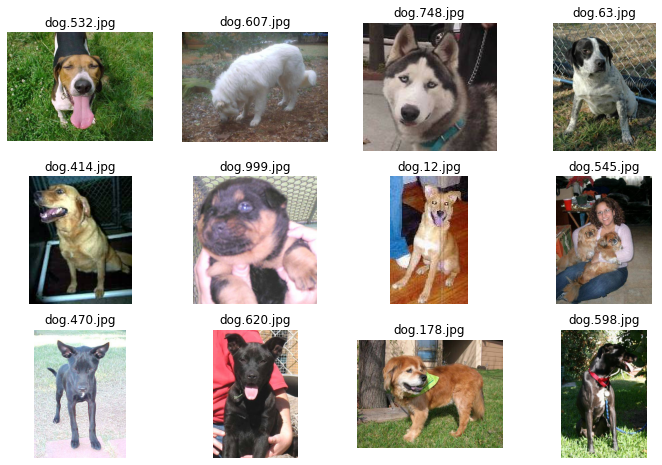

In [5]:
samples_dogs = np.random.choice(os.listdir(train_dogs_dir),size = 12)

plt.figure(figsize = (12,8))
for i,dog in enumerate(samples_dogs):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_dogs_dir,dog))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(dog)

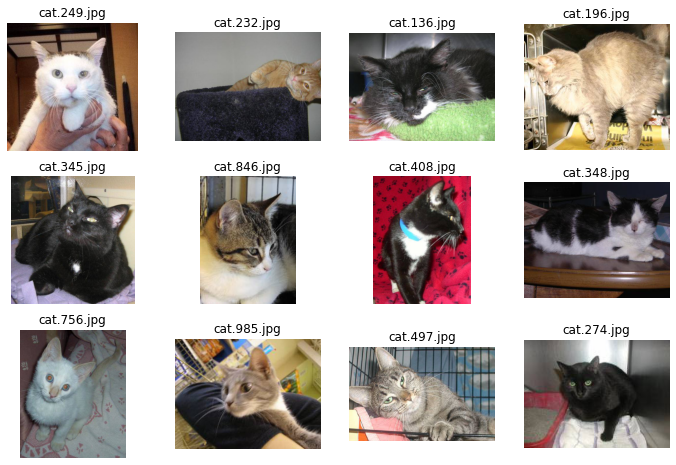

In [6]:
samples_cats = np.random.choice(os.listdir(train_cats_dir),size = 12)
plt.figure(figsize = (12,8))
for i,cat in enumerate(samples_cats):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_cats_dir,cat))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(cat)

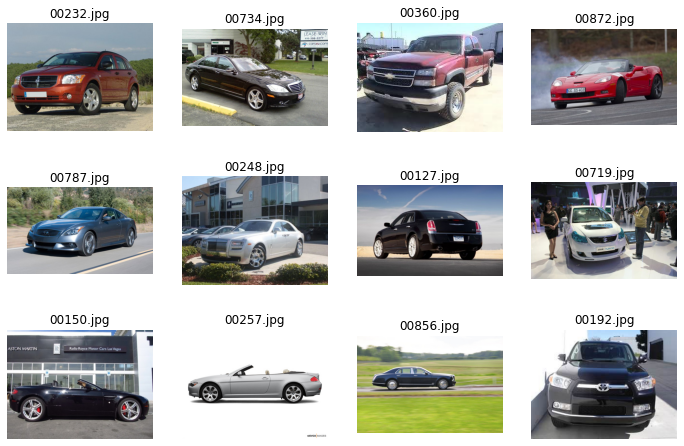

In [7]:
samples_cars = np.random.choice(os.listdir(train_cars_dir),size = 12)
plt.figure(figsize = (12,8))
for i,car in enumerate(samples_cars):
    ax = plt.subplot(3,4,i+1)
    img = mpimg.imread(os.path.join(train_cars_dir,car))
    plt.axis("off")
    plt.imshow(img)
    ax.set_title(car)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.0)
validation_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


## Création de notre modél

In [10]:
import tensorflow as tf
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (128,128,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [12]:
model.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001),loss='CategoricalCrossentropy',metrics = ['acc'])

## Entrainement de notre model

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,# 2000 images = batch_size * steps
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50 # 1000 images = batch_size * steps
)

Epoch 1/20
100/100 [==============================] - 145s 1s/step - loss: 0.9465 - acc: 0.5345 - val_loss: 0.9026 - val_acc: 0.5550
Epoch 2/20
100/100 [==============================] - 87s 864ms/step - loss: 0.6874 - acc: 0.6445 - val_loss: 0.6186 - val_acc: 0.6310
Epoch 3/20
100/100 [==============================] - 67s 672ms/step - loss: 0.6324 - acc: 0.6970 - val_loss: 0.5324 - val_acc: 0.7070
Epoch 4/20
100/100 [==============================] - 62s 617ms/step - loss: 0.5307 - acc: 0.7310 - val_loss: 0.5129 - val_acc: 0.7550
Epoch 5/20
100/100 [==============================] - 61s 609ms/step - loss: 0.4770 - acc: 0.7680 - val_loss: 0.5055 - val_acc: 0.7660
Epoch 6/20
100/100 [==============================] - 60s 595ms/step - loss: 0.4562 - acc: 0.7990 - val_loss: 0.5068 - val_acc: 0.7440
Epoch 7/20
100/100 [==============================] - 59s 588ms/step - loss: 0.3971 - acc: 0.8155 - val_loss: 0.4305 - val_acc: 0.7990
Epoch 8/20
100/100 [==============================] - 59s

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

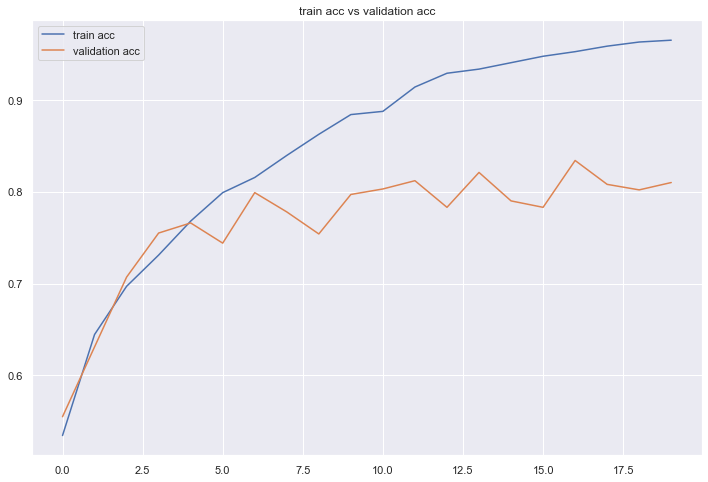

In [26]:
import seaborn as sns
sns.set()
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

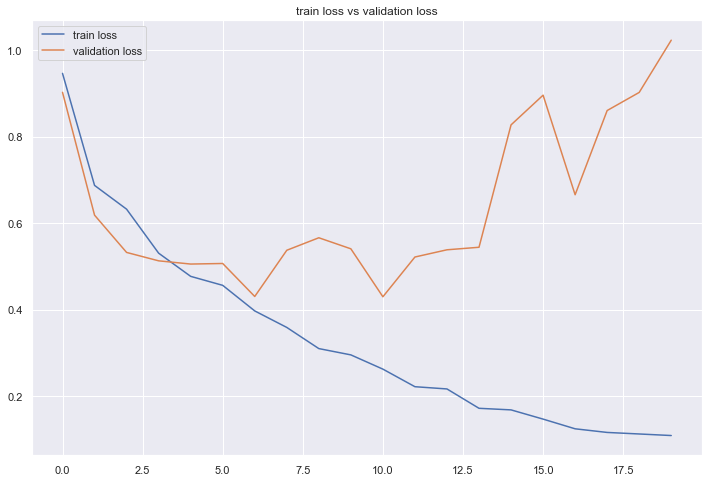

In [27]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# image augmentation

In [28]:
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [29]:
from tensorflow.keras.preprocessing import image

sample_cat = np.random.choice(os.listdir(train_cats_dir))
img = image.load_img(os.path.join(train_cats_dir,sample_cat),target_size = (128,128))
x = image.img_to_array(img)
x = x[np.newaxis]

datagen_img = datagen.flow(x,batch_size = 1)

In [30]:
x.shape

(1, 128, 128, 3)

(-0.5, 127.5, 127.5, -0.5)

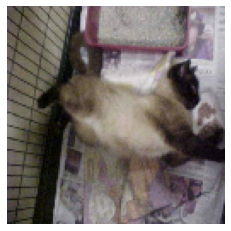

In [31]:
plt.imshow(img)
plt.axis("off")

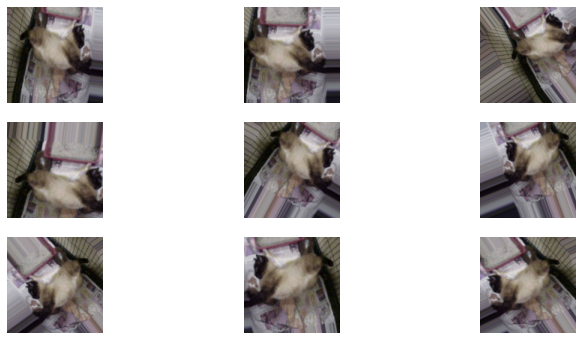

In [32]:
plt.figure(figsize = (12,6))
for i,batch in enumerate(datagen.flow(x,batch_size = 1)):
    
    ax = plt.subplot(3,3,i+1)
    plt.imshow(np.squeeze(batch).astype("int64"))
    plt.axis("off")
    
    if i == 8:
        break
plt.show()

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
    rescale = 1/255.0,      
    rotation_range=40, #va faire une rotation de l'image en choissisant un nb aleatoire entre 0 et 40
    width_shift_range=0.2, #va deplacer l'objet de 20% de sa largeur(il peut etre negatif)
    height_shift_range=0.2,
    shear_range=0.2,#va cisailler l'image de 20% 
    zoom_range=0.2, # pour zoomer dans l'image de 0 a 0.2
    horizontal_flip=True, #va faire une symetrie de l'image suivant la droite qui passe par le centre de l'image
    fill_mode='nearest' #pour specifier comment arranger l'image vu qu'elle va perdre les px aprtès nos operations
)

test_datagen = ImageDataGenerator(rescale = 1/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (128,128),
    batch_size = 20,
    class_mode = 'categorical'
)

Found 3000 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.


In [34]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32,(3,3) ,input_shape = (128,128,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3) ,activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(128,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512,activation = 'relu'),
    tf.keras.layers.Dense(3,activation = 'softmax')
])

In [35]:
model.compile(optimizer="adam",loss="categorical_crossentropy",
              metrics=['accuracy'])

In [47]:

history = model.fit(
    train_generator,
    steps_per_epoch=100,# 20000 images = batch_size * steps
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50 # 4000 images = batch_size * steps
)


Epoch 1/100
100/100 [==============================] - 67s 670ms/step - loss: 0.3754 - accuracy: 0.8315 - val_loss: 0.3896 - val_accuracy: 0.8280
Epoch 2/100
100/100 [==============================] - 67s 672ms/step - loss: 0.3660 - accuracy: 0.8375 - val_loss: 0.3874 - val_accuracy: 0.8220
Epoch 3/100
100/100 [==============================] - 64s 632ms/step - loss: 0.3778 - accuracy: 0.8415 - val_loss: 0.3815 - val_accuracy: 0.8260
Epoch 4/100
100/100 [==============================] - 63s 634ms/step - loss: 0.3624 - accuracy: 0.8375 - val_loss: 0.3387 - val_accuracy: 0.8560
Epoch 5/100
100/100 [==============================] - 65s 654ms/step - loss: 0.3586 - accuracy: 0.8320 - val_loss: 0.3597 - val_accuracy: 0.8480
Epoch 6/100
100/100 [==============================] - 65s 651ms/step - loss: 0.3397 - accuracy: 0.8515 - val_loss: 0.4739 - val_accuracy: 0.8130
Epoch 7/100
100/100 [==============================] - 66s 661ms/step - loss: 0.3677 - accuracy: 0.8320 - val_loss: 0.5439 -

Epoch 57/100
100/100 [==============================] - 85s 851ms/step - loss: 0.2684 - accuracy: 0.8945 - val_loss: 0.3146 - val_accuracy: 0.8840
Epoch 58/100
100/100 [==============================] - 85s 846ms/step - loss: 0.2535 - accuracy: 0.9065 - val_loss: 0.3321 - val_accuracy: 0.8560
Epoch 59/100
100/100 [==============================] - 84s 841ms/step - loss: 0.2715 - accuracy: 0.8835 - val_loss: 0.4510 - val_accuracy: 0.8390
Epoch 60/100
100/100 [==============================] - 85s 844ms/step - loss: 0.2467 - accuracy: 0.8980 - val_loss: 0.2898 - val_accuracy: 0.8840
Epoch 61/100
100/100 [==============================] - 83s 833ms/step - loss: 0.2614 - accuracy: 0.8875 - val_loss: 0.3673 - val_accuracy: 0.8650
Epoch 62/100
100/100 [==============================] - 84s 843ms/step - loss: 0.2609 - accuracy: 0.8825 - val_loss: 0.3593 - val_accuracy: 0.8510
Epoch 63/100
100/100 [==============================] - 86s 854ms/step - loss: 0.2401 - accuracy: 0.8935 - val_loss: 0

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = len(acc)

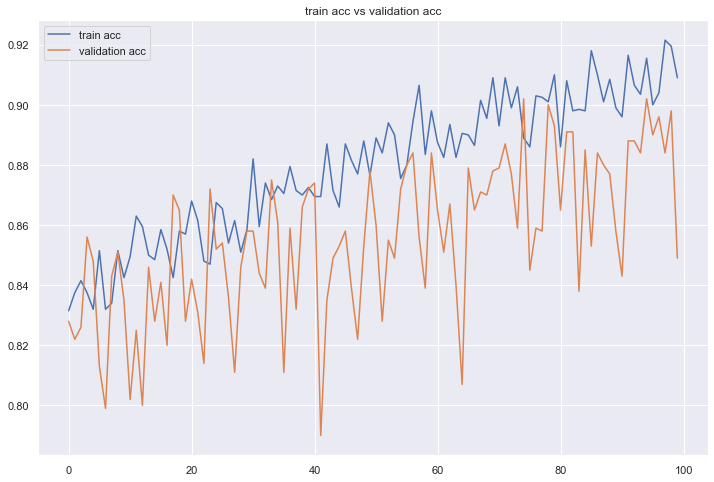

In [49]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),acc,label = "train acc")
plt.plot(np.arange(epochs),val_acc,label = "validation acc")
plt.title("train acc vs validation acc")
plt.legend()
plt.show()

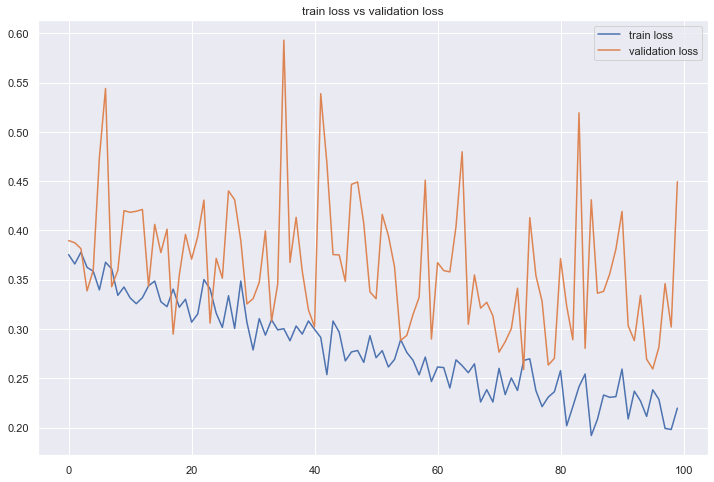

In [50]:
plt.figure(figsize = (12,8))
plt.plot(np.arange(epochs),loss,label = "train loss")
plt.plot(np.arange(epochs),val_loss,label = "validation loss")
plt.title("train loss vs validation loss")
plt.legend()
plt.show()

# Prediction

In [36]:
os.listdir("test")

[]

In [63]:
from tensorflow.keras.preprocessing import image
img = image.load_img('test/chien3.jpg',target_size = (128,128))
x = image.img_to_array(img)
x = x[np.newaxis]

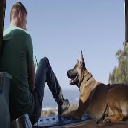

In [64]:
img

In [65]:
x.shape

(1, 128, 128, 3)

In [66]:
model.predict(x)

array([[1., 0., 0.]], dtype=float32)

In [107]:
train_generator.class_indices

{'cars': 0, 'cats': 1, 'dogs': 2}

In [108]:
train_generator.labels

array([0, 0, 0, ..., 2, 2, 2])

In [117]:
# model.save("model.hdf5")